# Deep Face Detection Model with 
## Pouya Taghipour
### Python

### Introduction to the project
This project is inpierd by a YouTube tutorial presented by Nicholas Renotte on his educational public channel.
Here is the link for the tutorial.


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import Image, ImageTk 
import json
import pandas as pd

In [2]:
def capture_images(num_images, output_dir):
  """Captures a specified number of images from the default camera.

  Args:
    num_images: The number of images to capture.
    output_dir: The directory to save the captured images.
  """

  cap = cv2.VideoCapture(0)  # Access the default camera

  for i in range(num_images):
      ret, frame = cap.read()
      if not ret:
          print("Error capturing image")
          continue
      img_path = f"{output_dir}/image_{i+1}.jpg"
      cv2.imwrite(img_path, frame)
      cv2.imshow("Capture", frame)
      if cv2.waitKey(1) & 0xFF == ord('q'):
          break

  cap.release()
  cv2.destroyAllWindows()


In [6]:
location = r'./Images'
capture_images(50, location)

In [1]:
import cv2
import os
import json
import tkinter as tk
from tkinter import filedialog

# Global variables
refPt = []
cropping = False
boxes = []

def click_and_crop(event, x, y, flags, param):
    global refPt, cropping, boxes

    # If the left mouse button is clicked, record the starting (x, y) coordinates
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True

    # If the left mouse button is released, record the ending (x, y) coordinates
    elif event == cv2.EVENT_LBUTTONUP:
        refPt.append((x, y))
        cropping = False

        # Draw a rectangle around the region of interest and save it
        cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        boxes.append((refPt[0], refPt[1]))
        cv2.imshow("image", image)

def label_images(image_folder, label_file):
    labels = {}
    
    # Loop over the images in the folder
    for image_name in os.listdir(image_folder):
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(image_folder, image_name)
            global image, boxes
            image = cv2.imread(image_path)
            clone = image.copy()
            boxes = []  # Reset the boxes for the new image
            cv2.namedWindow("image")
            cv2.setMouseCallback("image", click_and_crop)

            while True:
                cv2.imshow("image", image)
                key = cv2.waitKey(1) & 0xFF

                # If 'r' is pressed, reset the image
                if key == ord("r"):
                    image = clone.copy()
                    boxes = []

                # If 'c' is pressed, continue to the next image
                elif key == ord("c"):
                    break

                # If 'q' is pressed, quit labeling
                elif key == ord("q"):
                    cv2.destroyAllWindows()
                    return labels

            # Save the bounding boxes for the current image
            labels[image_name] = boxes
            cv2.destroyAllWindows()
    
    # Save all labels to the JSON file
    with open(label_file, "w") as f:
        json.dump(labels, f)

    print(f"Labels saved to {label_file}")

# Main function to select folder and run the labeling
def main():
    root = tk.Tk()
    root.withdraw()  # Hide the main Tkinter window

    # Prompt the user to select an image folder
    image_folder = filedialog.askdirectory(title="Select Folder Containing Images")

    if not image_folder:
        print("No folder selected. Exiting.")
        return

    # Prompt the user to select a location to save the label file
    label_file = filedialog.asksaveasfilename(defaultextension=".json", filetypes=[("JSON files", "*.json")])

    if not label_file:
        print("No label file selected. Exiting.")
        return

    # Run the labeling process
    label_images(image_folder, label_file)

if __name__ == "__main__":
    main()

Labels saved to D:/Project/Python pr/Deep Facial Detection/LabelImages/Labeled.json


In [7]:
def load_images_to_matrices(image_folder):
    matrices = []
    
    for image_name in os.listdir(image_folder):
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(image_folder, image_name)
            matrix = cv2.imread(image_path)
            
            if matrix is not None:
                matrices.append(matrix)
            else:
                print(f"Warning: Could not load image {image_name}")

    return np.array(matrices)

# Example usage
image_folder = "./Images"
image_matrices = load_images_to_matrices(image_folder)
print(f"Loaded {len(image_matrices)} images")

Loaded 50 images


In [8]:
image_matrices

array([[[[ 42,  44,  55],
         [ 42,  44,  55],
         [ 42,  44,  55],
         ...,
         [ 67,  81, 100],
         [ 66,  80,  99],
         [ 65,  79,  98]],

        [[ 42,  44,  55],
         [ 42,  44,  55],
         [ 42,  44,  55],
         ...,
         [ 67,  81, 100],
         [ 66,  80,  99],
         [ 65,  79,  98]],

        [[ 43,  45,  56],
         [ 43,  45,  56],
         [ 43,  45,  56],
         ...,
         [ 67,  81, 100],
         [ 66,  80,  99],
         [ 66,  80,  99]],

        ...,

        [[ 31,  28,  30],
         [ 29,  26,  28],
         [ 27,  24,  26],
         ...,
         [  5,   2,   4],
         [  5,   2,   4],
         [  5,   2,   4]],

        [[ 28,  25,  27],
         [ 25,  22,  24],
         [ 21,  18,  20],
         ...,
         [  5,   2,   4],
         [  5,   2,   4],
         [  5,   2,   4]],

        [[ 27,  24,  26],
         [ 23,  20,  22],
         [ 17,  14,  16],
         ...,
         [  5,   2,   4],
        

In [9]:
jsonLocation = './LabelImages/Labeled.json'
with open(jsonLocation, 'r') as file:
    data = json.load(file)

In [10]:
print(data)

{'image_1.jpg': [[[470, 164], [323, 304]]], 'image_10.jpg': [[[506, 176], [362, 316]]], 'image_11.jpg': [[[499, 176], [358, 316]]], 'image_12.jpg': [[[498, 170], [351, 319]]], 'image_13.jpg': [[[494, 175], [351, 320]]], 'image_14.jpg': [[[486, 173], [361, 320]]], 'image_15.jpg': [[[475, 171], [354, 320]]], 'image_16.jpg': [[[478, 168], [350, 305]]], 'image_17.jpg': [[[481, 171], [334, 342]]], 'image_18.jpg': [[[456, 169], [341, 319]]], 'image_19.jpg': [[[460, 176], [326, 308]]], 'image_2.jpg': [[[469, 181], [336, 301]]], 'image_20.jpg': [[[450, 172], [326, 315]]], 'image_21.jpg': [[[428, 172], [323, 305]]], 'image_22.jpg': [[[428, 172], [311, 312]]], 'image_23.jpg': [[[418, 164], [295, 323]]], 'image_24.jpg': [[[413, 169], [286, 319]]], 'image_25.jpg': [[[392, 161], [280, 320]]], 'image_26.jpg': [[[401, 148], [289, 303]]], 'image_27.jpg': [[[386, 180], [275, 302]]], 'image_28.jpg': [[[382, 176], [260, 321]]], 'image_29.jpg': [[[366, 174], [266, 308]]], 'image_3.jpg': [[[486, 185], [350

In [11]:
answer = []
for i in range(image_matrices.shape[0]) :
    answer.append(data[f"image_{i+1}.jpg"][0])

In [12]:
x_train = image_matrices[:40]
x_test = image_matrices[40:]
y_train = answer[:40]
y_test = answer[40:]

In [13]:
y_train[0]

[[470, 164], [323, 304]]

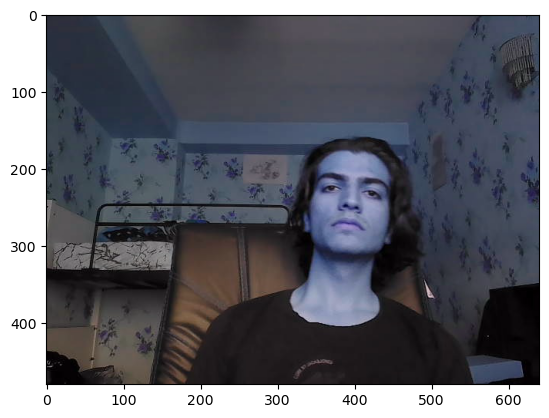

In [14]:
plt.imshow(x_train[0])

In [15]:
x_train[0].max()

240

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_test.shape

(10, 480, 640, 3)

In [18]:
x_train.shape

(40, 480, 640, 3)

In [19]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
y_train.shape

(40, 2, 2)

In [23]:
y_train = y_train.reshape(-1, 4)
y_test = y_test.reshape(-1, 4)

In [21]:
np.object = object
np.bool = bool
np.int = int

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(480,640,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(480,640,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation='relu', input_shape=(480,640,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(256, (3,3), activation='relu', input_shape=(480,640,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(512, (3,3), activation='relu', input_shape=(480,640,3)))
model.add(MaxPool2D(pool_size = (2,20)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(4))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 478, 638, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 237, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 118, 158, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 116, 156, 128)     73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 58, 78, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 56, 76, 256)      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
model.fit(x_train, y_train, epochs = 20,
          validation_data = (x_test, y_test), batch_size = 16, callbacks = [early_stop])

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

In [ ]:
metrics[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
my_image = x_test[5]

In [ ]:
plt.imshow(my_image)

In [ ]:
y_test[5]

In [ ]:
prediction = model.predict(my_image.reshape(1,480,640,3))

In [ ]:
prediction